In [1]:
from dlisio import dlis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [3]:
import dlisio
dlisio.__version__

'0.3.6'

## Loading DLIS Files

As we are working with single DLIS File, we can use the following code to load the files. A physical DLIS can contain multiple logical files, therefore, using this syntax allows the first file to be output to f and any subsequent logical files placed into tail.

In [4]:
f, *tail = dlis.load(r'C:\Jimmy\Codeholic\ongc-wire\science\DLIS\206_05a-_3_DWL_DWL_WIRE_258276498.DLIS')

We can see contents of each , by calling f we can see the o/p as below and tail is blank list so we know that there are no logical files within the DLIS

In [5]:
print(f)

LogicalFile(MSCT_197LTP)


In [35]:
f.frames
for i in f.frames:
    print(i)


Frame(2000T)
Frame(800T)


In [39]:
frame1 = f.object('FRAME' , '800T')
frame1

Frame(800T)

In [ ]:
curves = frame1.curves()
depth = curves['TDEP']* 0.00254
curves

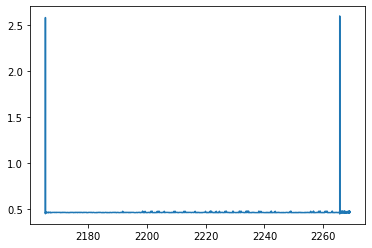

In [42]:
rcpp = curves['RCPP']
plt.plot(depth, rcpp)

In [ ]:
print(tail)

In [ ]:
# view methods on f
f.channels                 

To view the high level contents we can use .describe(). This will return information abt the no of frames, channels and objects within the file.We can see 2 frames and 104 channels (logging curves).

In [ ]:
f.describe()

## Viewing the file's Metadata

Data Origin : Source of the data

In [ ]:
origin , *origin_tail = f.origins

In [ ]:
origin

In [ ]:
origin_tail

In [ ]:
origin.describe()

## Frames

Frames within a DLIS file can represent logging passes or different stages of data such as raw well log measurements to petrophysical interpretations or processed data. Each frame has a number of properties 

In [ ]:
f.frames

In [ ]:
#loop over each frame within the file
for frame in f.frames:

        # Search through the channels for the index aqnd obtain the units
        for channel in frame.channels:
            if channel.name == frame.index:
                depth_units = channel.units
                
        print(f'Frame Name: \t\t {frame.name}')
        print(f'Index Type: \t\t {frame.index_type}')
        print(f'Depth Interval: \t {frame.index_min} - {frame.index_max} {depth_units}')
        print(f'Depth Spacing: \t\t {frame.spacing} {depth_units}')
        print(f'Direction: \t\t {frame.direction}')
        print(f'Num of Channels: \t {len(frame.channels)}')
        print(f'Channel Names: \t {str(frame.channels)}')
        print('\n\n')

### Parameters within the DLIS file

In [ ]:
def summary_dataframe(object, **kwargs):
    #create an empty dataframe
    df = pd.DataFrame()
    
    #Iterate over each of the keyword arguments
    for i, (key,value) in enumerate(kwargs.items()):
        list_of_values =[]
        
        #Iterate over each parameter and get the relevant key
        for items in object:
            #Account for any missing values.
            
            try:
                x = getattr(items, key)
                list_of_values.append(x)
            except:
                list_of_values.append('')
                continue
        
        #Add a new column to our dataframe
        df[value] = list_of_values
        
    # Sort the dataframe  by column 1 and return it
    return df.sort_values(df.columns[0])


        
        
    

The parameters can be accessed by calling upon f.parameters. To access the parameters we can use the attributes name, long_name and values and pass these into summary function

This returns a long table of each of the parameter. The example below is a small section of that table. From it we can see parameters such as bottom log interval, borehole salinity and bottom hole temperature.

In [ ]:
param_df = summary_dataframe(f.parameters, name ='Name', long_name = 'Long Name', values = 'Values')


# Hiding people's name that maybe in parameters.
# These 2 lines can be commented out to show them
mask = param_df['Name'].isin(['R8', 'RR1','WITN','ENGI'])
param_df = param_df[~mask]

param_df

## Channels

The channels within a frame are the individual curves or arrays. To view a quick summary of these, we can pass in a number of attributes to the summary_dataframe() method.

In [ ]:
channels = summary_dataframe(f.channels , name= 'Name', long_name= 'Long Name', values = 'Values')
channels

## Tools

The tools object within the DLIS file contains information relating to the tools that were used to acquire the data. We can get a summary of the tools available by calling upon the summary_dataframe method.

In [ ]:
tools = summary_dataframe(f.tools, name= 'Name', description = 'Description')
tools

In [ ]:
f.tools

As we are looking to plot accoustic waveform data, we can look at the parameters for the MSCT tool. First, we need to grab the object from the dlis and then pass it into the summary_dataframe function

From the returned table, we can view each of the parameters that relate to the tool and the processing of the data

In [ ]:
msct = f.object('TOOL', 'MSCT')
msct_params = summary_dataframe(msct.parameters, name = 'Name', long_name= 'Long Name', value = 'Values')

In [ ]:
msct_params

## Working With Data Objects

Now that some of the meta data has been explored, we can now attempt to access the data stored within the file.

In [ ]:
frame1 = f.object('FRAME' , '800T')

In [ ]:
frame1

We can also directly access the channels for a specific curve. However, this can cause confusion when working with frames containing channels/curves with the same name.

In [ ]:
bhpr = f.object('CHANNEL', 'BHPR')

#Print out the properties of the channel/curve

print(f'Name: \t\t{bhpr.name}')
print(f'Long Name: \t\t{bhpr.long_name}')
print(f'Units: \t\t{bhpr.units}')
print(f'Dimension: \t\t{bhpr.dimension}')

In [ ]:
bs = f.object('CHANNEL', 'BS')

#Print out the properties of the channel/curve

print(f'Name: \t\t{bs.name}')
print(f'Long Name: \t\t{bs.long_name}')
print(f'Units: \t\t{bs.units}')
print(f'Dimension: \t\t{bs.dimension}')

In [ ]:
hmdv = f.object('CHANNEL', 'HMDV')

#Print out the properties of the channel/curve

print(f'Name: \t\t{hmdv.name}')
print(f'Long Name: \t\t{hmdv.long_name}')
print(f'Units: \t\t{hmdv.units}')
print(f'Dimension: \t\t{hmdv.dimension}')

## Plotting Data

In [ ]:
curves = frame1.curves()

In [ ]:
curves
rcpp = curves['RCPP']
plt.plot(depth, rcpp)

In [ ]:
depth = curves['TDEP']* 0.00254
rcpp = curves['RCPP']
rhmd = curves['RHMD']

print(f'{depth.min()} - {depth.max()}')

In [ ]:
rppv = curves['RPPV']

In [ ]:
bs = curves['BS']

In [ ]:
rppv

In [ ]:
rcpp

In [ ]:
rhmd

In [ ]:
plt.plot(depth, rppv)
plt.plot(depth,rhmd)
plt.ylim(40, 240)

In [ ]:
plt.plot(depth, rppv)

In [ ]:
plt.plot( depth)

In [ ]:
plt.plot(depth,rcpp)

In [ ]:
plt.plot(rcpp)

In [ ]:
plt.plot(rppv)

In [ ]:
plt.plot(rhmd)

In [ ]:
plt.plot(depth, rhmd)